# Potato Disease Classification

- Dataset : https://www.kaggle.com/arjuntejaswi/plant-village
- Statement : 최근 농업에 있어서 매해 다양한 질병들에 의해 많은 경제적 손실이 나타나고 있다. 대개 일반적인 두가지 질병이 존재한다. 

"Early Blight" : 곰팡이, 균에 의해 발현

"Late Blight" : 특정한 미생물에 의해 발현

농업에 종사하고 있는 사람들은 질병을 직접 관찰하고 돌보지만 이는 많은 경제적 손해를 불러 일으킨다. 두가지 질병에 대한 관리법이 다소 다르지만 각 질병을 정확히 감지할 필요가 있다. AI 회사인 ATLIQ Agriculture는 농업에 있어서 존재하는 문제들을 해결하려고한다. 그들은 모바일 앱으로 농업에 종사하고 있는 사람들에게 도움을 주는데, 그냥 사진만 한장 찍으면 식물이 건강한지 병들었는지 더 나아가 어떤 질병을 앓고 있는지까지 딥러닝(CNN Model)을 통해 스캔해준다. 


![Potato](./ddd.PNG)

In [4]:
!pip install split-folders

In [6]:
!splitfolders --ratio 0.8 0.1 0.1 -- ./PlantVillage/


Copying files: 0 files [00:00, ? files/s]
Copying files: 11 files [00:00, 95.91 files/s]
Copying files: 22 files [00:00, 100.70 files/s]
Copying files: 39 files [00:00, 128.82 files/s]
Copying files: 52 files [00:00, 121.11 files/s]
Copying files: 65 files [00:00, 122.28 files/s]
Copying files: 81 files [00:00, 132.81 files/s]
Copying files: 97 files [00:00, 136.90 files/s]
Copying files: 111 files [00:00, 131.81 files/s]
Copying files: 127 files [00:00, 136.10 files/s]
Copying files: 144 files [00:01, 140.90 files/s]
Copying files: 159 files [00:01, 135.19 files/s]
Copying files: 173 files [00:01, 129.34 files/s]
Copying files: 187 files [00:01, 131.57 files/s]
Copying files: 201 files [00:01, 133.86 files/s]
Copying files: 215 files [00:01, 134.89 files/s]
Copying files: 231 files [00:01, 138.64 files/s]
Copying files: 246 files [00:01, 140.89 files/s]
Copying files: 261 files [00:01, 130.45 files/s]
Copying files: 278 files [00:02, 141.18 files/s]
Copying files: 294 files [00:02, 1

Copying files: 12198 files [01:24, 111.47 files/s]
Copying files: 12210 files [01:24, 86.26 files/s] 
Copying files: 12220 files [01:24, 86.41 files/s]
Copying files: 12230 files [01:24, 86.00 files/s]
Copying files: 12240 files [01:24, 88.80 files/s]
Copying files: 12250 files [01:24, 86.53 files/s]
Copying files: 12261 files [01:24, 89.42 files/s]
Copying files: 12271 files [01:25, 92.20 files/s]
Copying files: 12283 files [01:25, 99.42 files/s]
Copying files: 12303 files [01:25, 126.42 files/s]
Copying files: 12316 files [01:25, 117.71 files/s]
Copying files: 12329 files [01:25, 114.19 files/s]
Copying files: 12341 files [01:25, 112.71 files/s]
Copying files: 12353 files [01:25, 111.97 files/s]
Copying files: 12365 files [01:25, 112.05 files/s]
Copying files: 12378 files [01:25, 116.07 files/s]
Copying files: 12390 files [01:25, 115.73 files/s]
Copying files: 12402 files [01:26, 111.96 files/s]
Copying files: 12414 files [01:26, 108.23 files/s]
Copying files: 12425 files [01:26, 106

Copying files: 15889 files [01:54, 111.35 files/s]
Copying files: 15901 files [01:54, 106.67 files/s]
Copying files: 15912 files [01:54, 104.05 files/s]
Copying files: 15925 files [01:54, 110.34 files/s]
Copying files: 15943 files [01:54, 129.66 files/s]
Copying files: 15957 files [01:54, 122.77 files/s]
Copying files: 15970 files [01:55, 117.81 files/s]
Copying files: 15983 files [01:55, 117.11 files/s]
Copying files: 15995 files [01:55, 112.91 files/s]
Copying files: 16007 files [01:55, 112.23 files/s]
Copying files: 16019 files [01:55, 112.66 files/s]
Copying files: 16031 files [01:55, 112.14 files/s]
Copying files: 16043 files [01:55, 109.89 files/s]
Copying files: 16055 files [01:55, 106.61 files/s]
Copying files: 16066 files [01:55, 103.79 files/s]
Copying files: 16078 files [01:56, 104.67 files/s]
Copying files: 16089 files [01:56, 94.47 files/s] 
Copying files: 16102 files [01:56, 102.74 files/s]
Copying files: 16113 files [01:56, 100.85 files/s]
Copying files: 16125 files [01:

## Module Import

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [16]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage", shuffle = True, image_size = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
68*32

2176

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0]


In [8]:
# 첫번재 이미지  tensor 형태 정보 출력(numpy() 형태로도 출력 가능)
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[161. 148. 157.]
  [162. 149. 158.]
  [162. 149. 158.]
  ...
  [139. 128. 134.]
  [153. 142. 148.]
  [157. 146. 152.]]

 [[158. 145. 154.]
  [160. 147. 156.]
  [162. 149. 158.]
  ...
  [169. 158. 164.]
  [153. 142. 148.]
  [155. 144. 150.]]

 [[160. 147. 156.]
  [162. 149. 158.]
  [165. 152. 161.]
  ...
  [160. 149. 155.]
  [135. 124. 130.]
  [159. 148. 154.]]

 ...

 [[138. 125. 135.]
  [142. 129. 139.]
  [145. 132. 142.]
  ...
  [140. 125. 128.]
  [136. 121. 124.]
  [122. 107. 110.]]

 [[144. 131. 141.]
  [149. 136. 146.]
  [151. 138. 148.]
  ...
  [154. 140. 140.]
  [144. 130. 130.]
  [124. 110. 110.]]

 [[144. 131. 141.]
  [149. 136. 146.]
  [150. 137. 147.]
  ...
  [141. 127. 127.]
  [143. 129. 129.]
  [137. 123. 123.]]], shape=(256, 256, 3), dtype=float32)


## Data Visualization

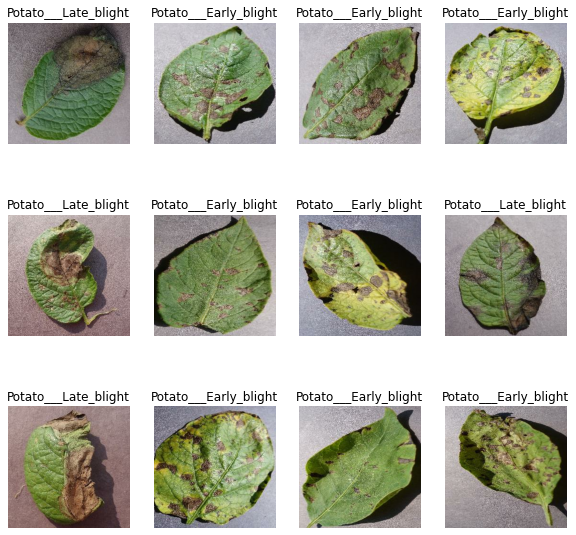

In [14]:
# 이미지 visualization
plt.figure(figsize = (10, 10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [15]:
len(dataset)

68

## Train test split
- 80% : Training
- 10% : Validation
- 10% : Test

In [17]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [19]:
train_ds = dataset.take(54) # [:54]
len(train_ds)

54

In [20]:
test_ds = dataset.skip(54) # [54:]
len(test_ds)

14

In [21]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [22]:
val_ds = dataset.take(6)
len(val_ds)

6

In [23]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [24]:
def get_dataset_partitions_tf(ds, train_split = .8, val_split = .1, test_split = .1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [25]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [26]:
len(train_ds)

54

In [27]:
len(val_ds)

6

In [28]:
len(test_ds)

8

In [29]:
# prefetch : model performance 향상
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## Data Augmentation

In [31]:
# 모델을 좀 더 강건하게(robust) 만들어주기위한 레이어 제작
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

In [33]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

## Build and train a CNN model

In [37]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = intput_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (32, 60, 60, 64)         

In [40]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
             metrics = ['acc'])

In [41]:
history = model.fit(train_ds,
         epochs = EPOCHS,
         batch_size = BATCH_SIZE,
         verbose = 1,
         validation_data = val_ds)

Epoch 1/50
54/54 [==============================] - 16s 79ms/step - loss: 0.9104 - acc: 0.4942 - val_loss: 0.8760 - val_acc: 0.4226
Epoch 2/50
54/54 [==============================] - 3s 52ms/step - loss: 0.6783 - acc: 0.7095 - val_loss: 0.5825 - val_acc: 0.7202
Epoch 3/50
54/54 [==============================] - 3s 52ms/step - loss: 0.4400 - acc: 0.8171 - val_loss: 0.2780 - val_acc: 0.9226
Epoch 4/50
54/54 [==============================] - 3s 51ms/step - loss: 0.2621 - acc: 0.8929 - val_loss: 0.3567 - val_acc: 0.8690
Epoch 5/50
54/54 [==============================] - 3s 52ms/step - loss: 0.4774 - acc: 0.7922 - val_loss: 0.4288 - val_acc: 0.8214
Epoch 6/50
54/54 [==============================] - 3s 51ms/step - loss: 0.2995 - acc: 0.8900 - val_loss: 0.3000 - val_acc: 0.8750
Epoch 7/50
54/54 [==============================] - 3s 51ms/step - loss: 0.2433 - acc: 0.8999 - val_loss: 0.2328 - val_acc: 0.9107
Epoch 8/50
54/54 [==============================] - 3s 55ms/step - loss: 0.1996 - 

In [43]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 0s 22ms/step - loss: 0.1796 - acc: 0.9492


In [44]:
scores

[0.17961184680461884, 0.94921875]

## Plot Training history on graph

In [45]:
history

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

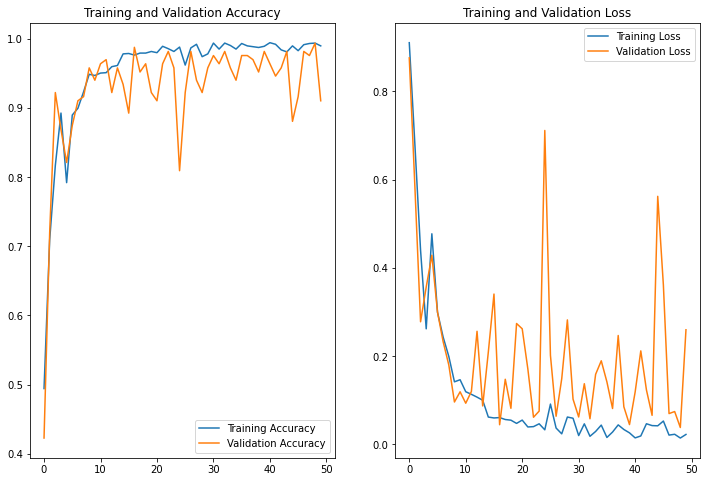

In [50]:
EPOCHS = 50

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Make predictions/inference on sample images

In [60]:
import numpy as np

first image to predict
actual label: Potato___Early_blight
Potato___Early_blight


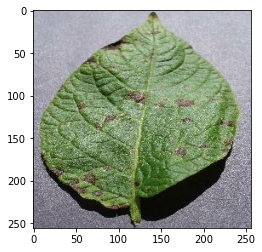

In [74]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    
    print('first image to predict')
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [75]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

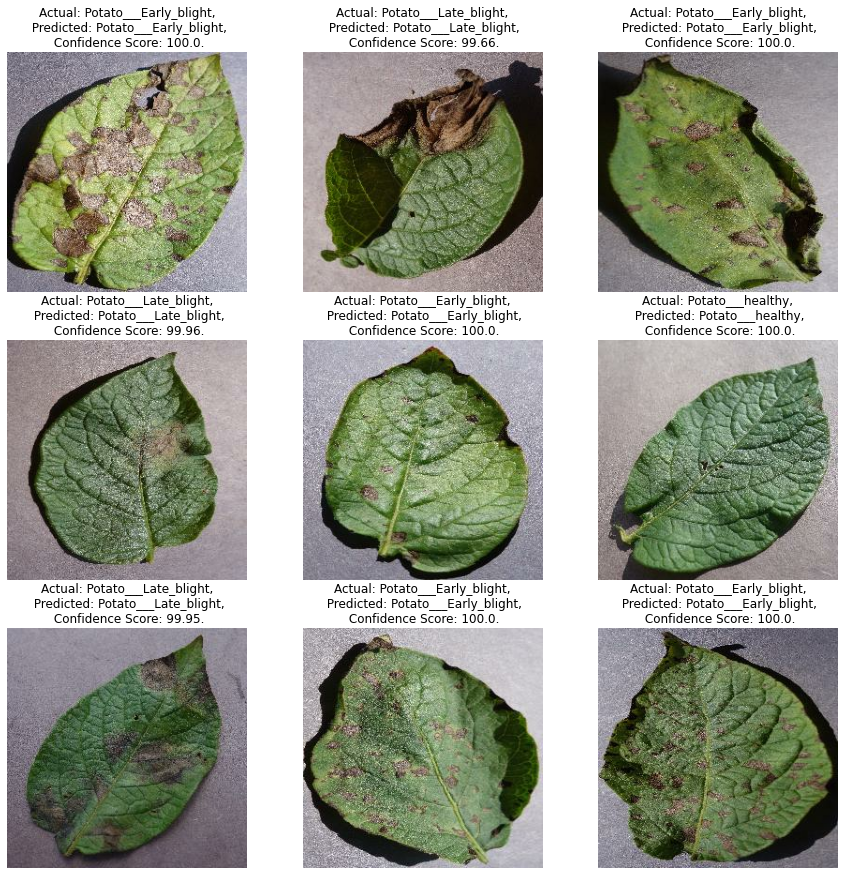

In [85]:
plt.figure(figsize = (15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}.")
        
        plt.axis('off')

In [98]:
import os
model_version = max([int(i) for i in os.listdir('./models') + [0]]) + 1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/4\assets


In [88]:
model_version = 2
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/2\assets
